# CS166 Final Project


Things to do:
- Create Berlin Network map
    * Define neighborhoods and their attributes
        * Population
        * Traffic (to be added on the travel time of an ambulance in that neighborhood)
    * The edges between the neighborhood nodes
- Create ambulance class
    * Attributes: 
        * Home base
        * Status
        * Noº trips

- Main simulation:
    * Initialize the simulation depending on some strategy
        * Connectivity of neighborhood.
        * Population ratio.
    * Create random tasks for the ambulances
    * Calculate metrics

- Discussion
    * Compare strategies
    * Make suggestion
    


## Create Network map

To create a network map of Berlin we can designate each district/neighborhood (I will use district and neighborhood interchangably) a node in our network and the connections between the neighborhoods as the edges. The nodes have attributes of population (as a proxy for the likelihood of an emergency call being made), size (to be used when getting the random value for how long an ambulance takes within the neighborhood).

Berlin can be divided into following neighborhoods with populations (Amt für Statistik Berlin-Brandenburg, 2007): 
- Mitte 230469
- Friedrichshain-Kreuzberg 200487
- Pankow 327985
- Charlottenburg-
- Wilmersdorf 251304
- Spandau 193641
- Steglitz-Zehlendorf 256184
- Tempelhof-Schöneberg 274225
- Neukölln 234 564
- Treptow-Köpenick 227142
- Marzahn- Hellersdorf 237231
- Lichtenberg 231894
- Reinickendorf 218728
 
 --> Berlin 2 883 854

Taking the edges of each neighborhood as the neighborhoods it borders to we can create a list of edges to be added to the network. 

We therefore add undirected edges from across each district border.

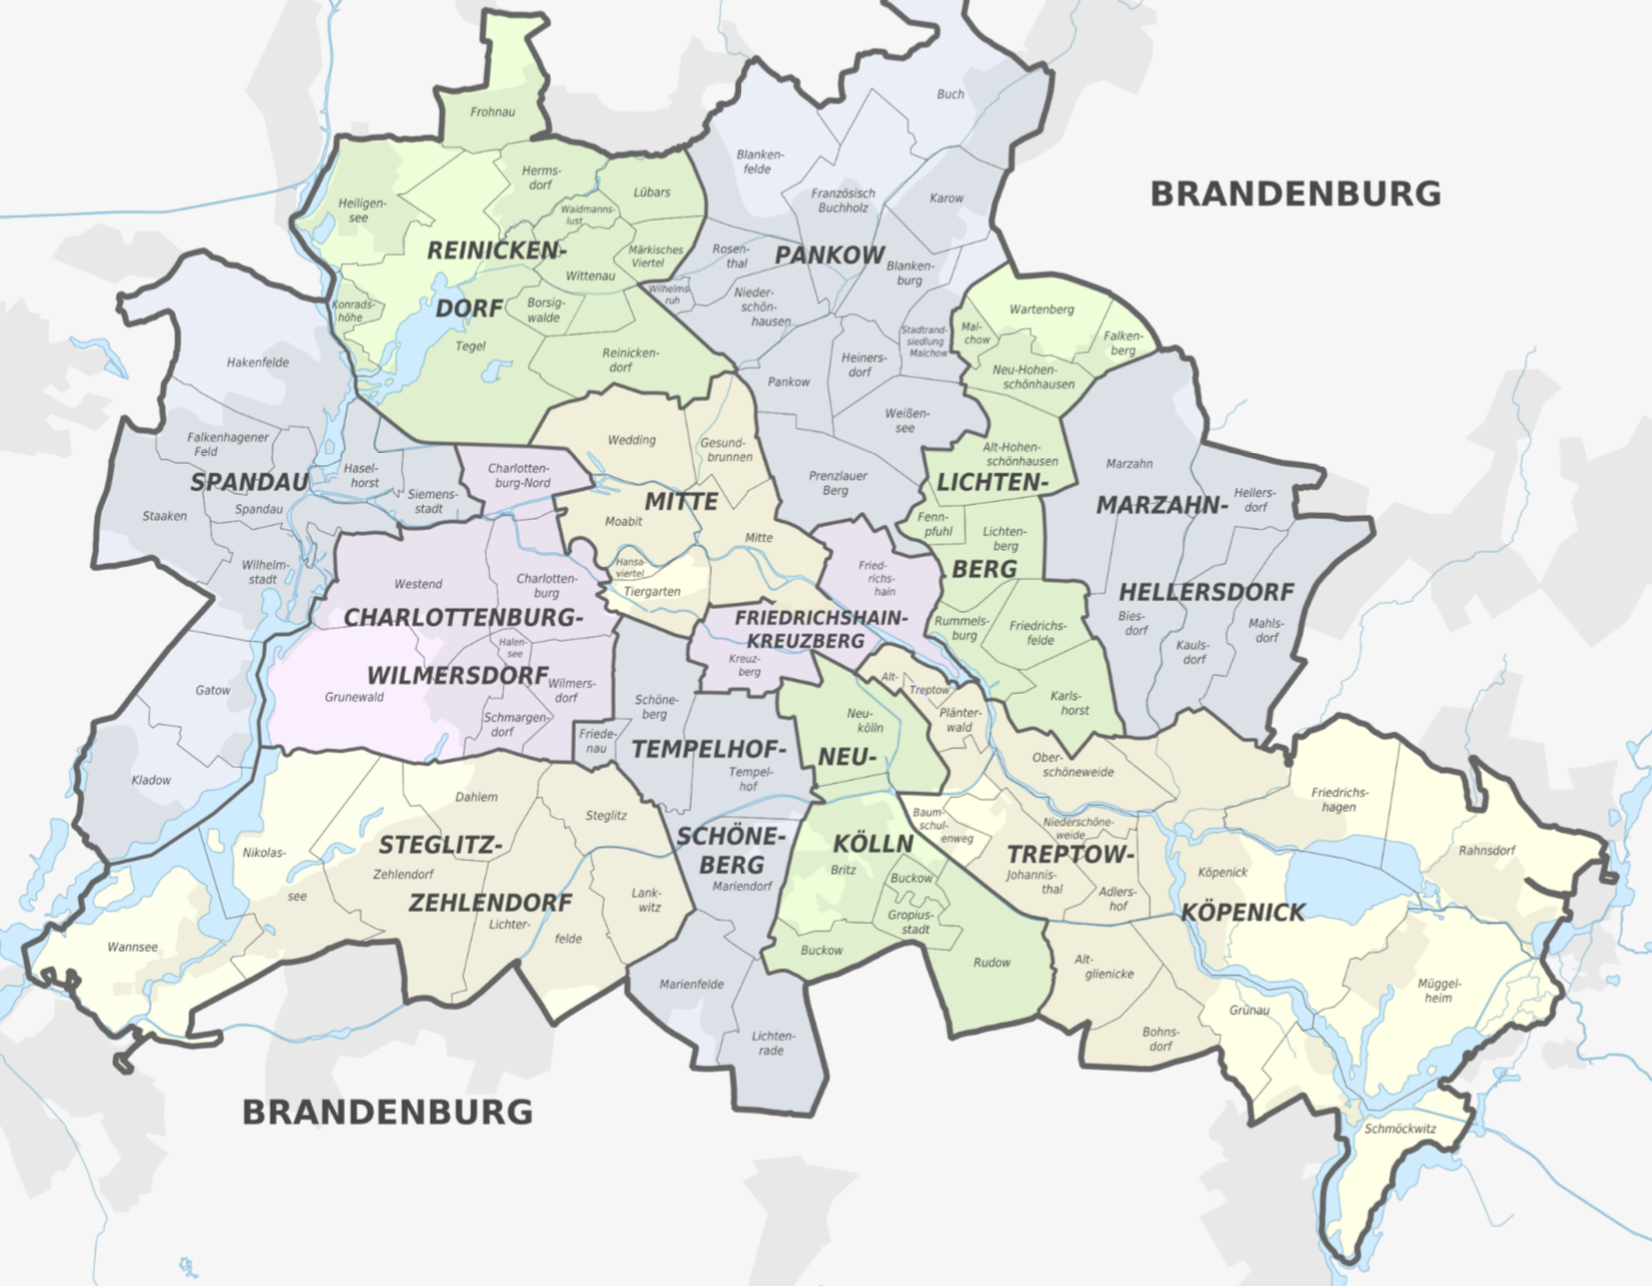

In [1]:
import networkx as nx
import random as rd



#List of all nodes and their populations
districs = [["Mitte", 230469, 6], 
            ["Friedrichshain-Kreuzberg", 200487, 2], 
            ["Pankow", 327985, 13], 
            ['Charlottenburg-Wilmersdorf', 251304, 7],
            ['Spandau',193641, 9],
            ['Steglitz-Zehlendorf', 256184, 7],
            ['Tempelhof-Schöneberg', 274225, 6],
            ['Neukölln', 234564, 6],
            ['Treptow-Köpenick', 227142, 15],
            ['Marzahn-Hellersdorf', 237231, 5],
            ['Lichtenberg', 231894, 10],
            ['Reinickendorf', 218728, 11]]

#List of all edges
Edge_list = [('Reinickendorf','Spandau'),('Reinickendorf', 'Pankow'),
             ('Reinickendorf', 'Mitte'),
             ('Reinickendorf', 'Charlottenburg-Wilmersdorf'),
             ['Spandau','Charlottenburg-Wilmersdorf'],
             ['Spandau', 'Steglitz-Zehlendorf'],
             ['Charlottenburg-Wilmersdorf','Steglitz-Zehlendorf'],
             ['Charlottenburg-Wilmersdorf', 'Tempelhof-Schöneberg'],
             ['Mitte', 'Tempelhof-Schöneberg'],
             ['Friedrichshain-Kreuzberg', 'Tempelhof-Schöneberg'],
             ['Friedrichshain-Kreuzberg', 'Mitte'],
             ['Charlottenburg-Wilmersdorf', 'Mitte'],
             ['Pankow', 'Mitte'],
             ['Pankow', 'Lichtenberg'],
             ['Pankow', 'Friedrichshain-Kreuzberg'],
             ['Steglitz-Zehlendorf', 'Tempelhof-Schöneberg'],
             ['Lichtenberg', 'Marzahn-Hellersdorf'],
             ['Lichtenberg','Friedrichshain-Kreuzberg'],
             ['Lichtenberg', 'Treptow-Köpenick'],
             ['Friedrichshain-Kreuzberg', 'Neukölln'],
             ['Treptow-Köpenick', 'Neukölln'],
             ['Tempelhof-Schöneberg','Neukölln'],
             ['Friedrichshain-Kreuzberg', 'Treptow-Köpenick'],
             ['Marzahn-Hellersdorf', 'Treptow-Köpenick']]

#initialize the map
Berlin = nx.Graph()

#add the nodes
for district in districs:
    Berlin.add_node(district[0], Pop = district[1], Kiez = district[2])
#add the edges
for edge in Edge_list:
    Berlin.add_edge(edge[0], edge[1], weight = rd.normalvariate(10, 2))

print(Berlin.nodes()['Mitte']['Pop'])
print(Berlin.edges()['Marzahn-Hellersdorf', 'Treptow-Köpenick']['weight'])

230469
12.720339824141234


In [2]:
import pandas as pd

pd.DataFrame(districs, columns=['Neighborhood', 'Population', 'No. suburbs'])

,Neighborhood,Population,No. suburbs
0,Mitte,230469,6
1,Friedrichshain-Kreuzberg,200487,2
2,Pankow,327985,13
3,Charlottenburg-Wilmersdorf,251304,7
4,Spandau,193641,9
5,Steglitz-Zehlendorf,256184,7
6,Tempelhof-Schöneberg,274225,6
7,Neukölln,234564,6
8,Treptow-Köpenick,227142,15
9,Marzahn-Hellersdorf,237231,5


/usr/local/lib/python3.6/dist-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


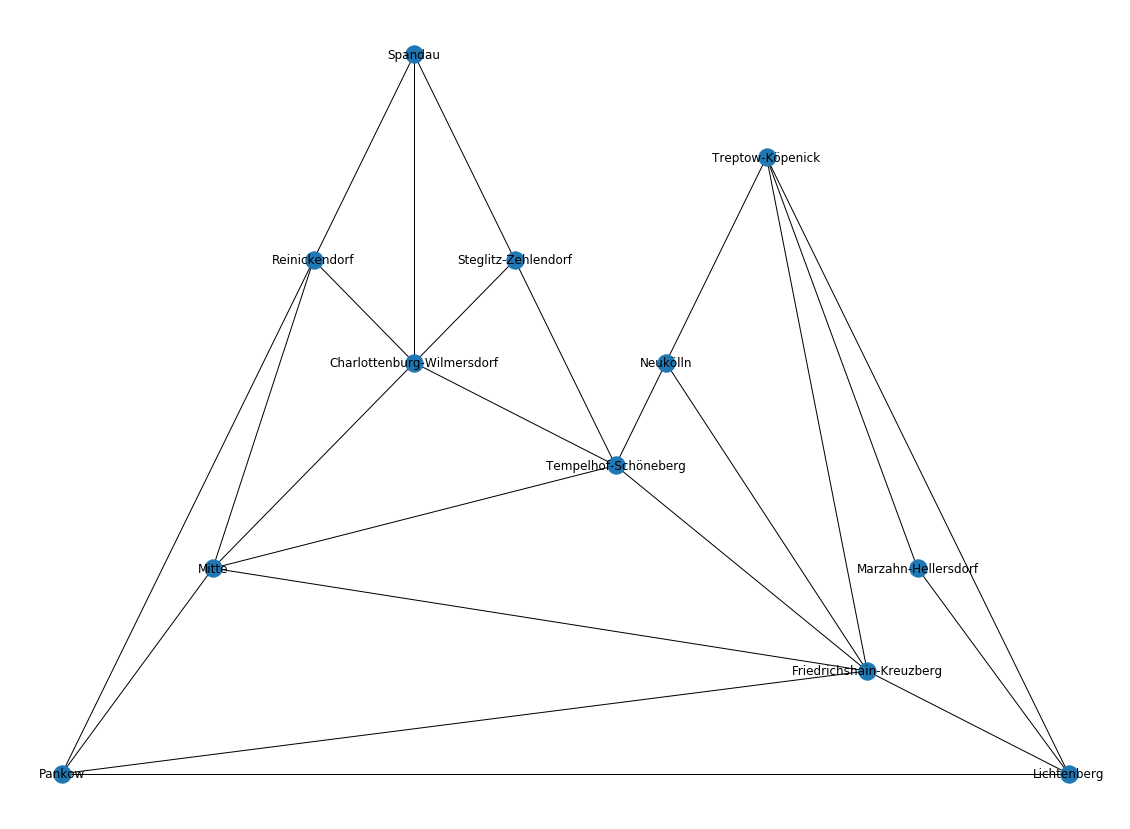

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
labels = nx.draw_networkx_labels(Berlin, pos = nx.planar_layout(Berlin))
nx.draw(Berlin, pos = nx.planar_layout(Berlin))

([<matplotlib.axis.YTick at 0x7f3f38859208>,
 <a list of 12 Text yticklabel objects>)

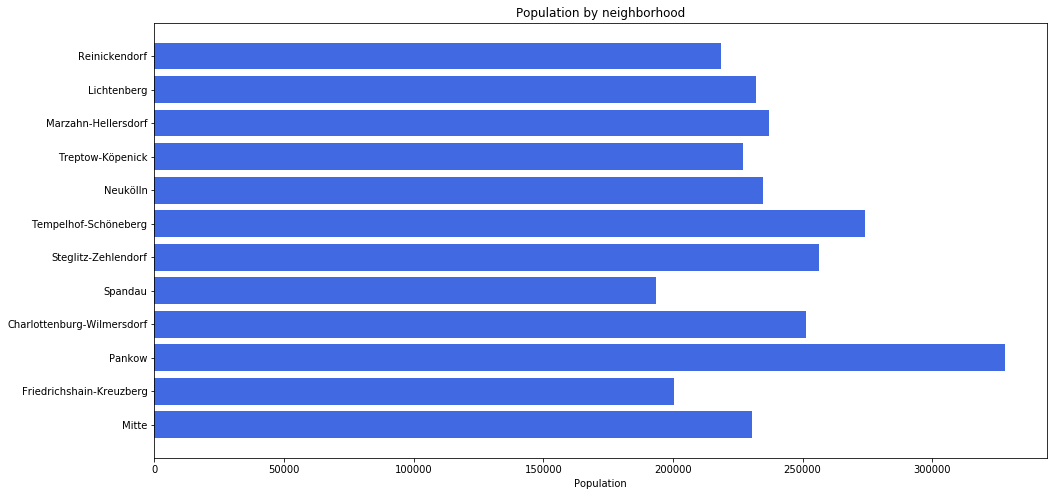

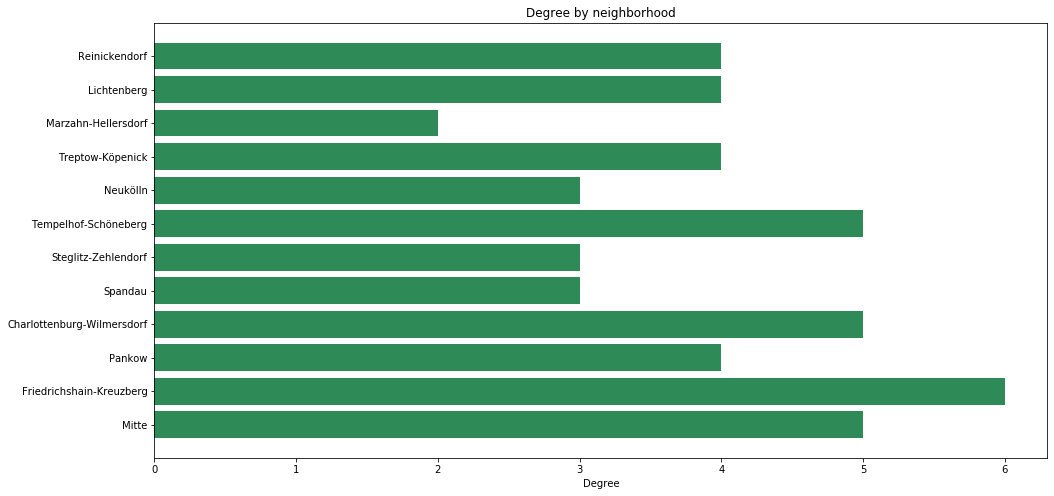

In [4]:
N = len(Berlin.nodes())
populations = [Berlin.nodes()[n]['Pop'] for n in Berlin.nodes()]

ind = [n for n in Berlin.nodes()]  # the x locations for the groups
width = 0.35       # the width of the bars




plt.figure(figsize= (16, 8))
plt.barh(ind, populations, color='royalblue')
plt.xlabel('Population')
plt.title('Population by neighborhood')
plt.yticks(ind)
#plt.ylabel([n for n in Berlin.nodes()])

plt.figure(figsize= (16, 8))
degrees = [Berlin.degree()[n] for n in Berlin.nodes()]
plt.barh(ind, degrees, color='seagreen')
plt.xlabel('Degree')
plt.title('Degree by neighborhood')
plt.yticks(ind)
#plt.ylabel([n for n in Berlin.nodes()])

In [0]:
#define an ambulance class

class Ambulance:

    """
    class: Ambulance
    Attributes: - ready: Ready (True) or Used (False)
                - trips: number of trips
                - depot: node of the home depot in Berlin
    """

    def __init__(self, depot):
        self.ready_at = 0
        self.trips = 0
        self.depot = depot


class Emergency:

    '''
    class: Emergency
    Attributes: - Location
                - Start-time
    '''

    def __init__(self, district, time):
        self.district = district
        self.start = time

## Simulation

The ambulances in our simulation will take the emergency on the top of our emergency queue and solve it next. That is once an emergency call comes in it is added to the back of the queue and as soon as any ambulance is ready it will tend to the emergency. The closest ambulance will be chosen.

The trip will take as much time as it takes to get from the current depot node to its edge (that is a random time controlled by the traffic aspect of each node in the network), plus the shortest path of the edges, plus the random traffic of the target node. This is multiplied by two to account for the way there and back. To generate each edge weight is initialized around a mean of 10 with standard deviation of 2 for now and the traffic of each node is defined by the number of different sub-urbs shown in the Figure 1. The more suburbs the larger the size of the neighborhood and hence any trip within that neighborhood will take longer. It will be taken as the mean of a normal distribution to generate the time taken within that neighborhood. 

In 2013 there were roughly 380,000 calls to emergency services (BZ, 2014). Therefore, we can make a rough estimation of the number of emergencies that occur every 10 minutes: 


380000/365 is roughly 1000 daily calls

That then means roughly 40 calls an hour. 

Hence roughly 7 calls every 10 minutes or 0.7 calls a minute. 

Therefore, if we want to let our simulation run for minutes we can use a probability of 0.7 emergencies per minute when creating emergencies.
After having the decision made that an emergency is going to occur, we use a a wheel that use the cumulative probabilities of the neighborhoods to select which neighborhood the emergency occurs in. 


#### Strategy 1: Population

The first initialization strategy is the number of people who live in a neighborhood. That is, neighborhoods with more people are more likely receive the emergencies and should therefore have more ambulances to. Therefore, an ambulance will be stationed at the neighborhood of emergency with the same probability as the emergency is occurring there. 

This reduces the time taken for an emergency to be completed from:

$T_E = traffic_H + \sum_{e = 1}^{e = shortest path}{w_e} + traffic_E $ 

to

$T_E = traffic_H$

Where $traffic_H$ is the traffic at the home district and $traffic_E$ is the traffic in the emergency neighborhood. Note that the two traffic terms include the way from the current location to the emergency and back. That is if there is an emergency in a neighborhood the traffic includes all movement within that neighborhood.

The traffic in a neighborhood is calculated using a the absolute, rounded value drawn from a normal distribution centered around the number of suburbs with standard deviation of 2 minutes. There are two manipulating choices made here:
- Rounding:

    The time step the simulation is operating in is minutes. Therefore, we will be using only minutes to denote the length of a task.

- Absolute value: 

    Notice, how there are neighborhoods such as Friedrichshain-Kreuzberg with just two suburbs. This means that there is a roughly 15% change of a value being below 0. A value of negative time is not real and hence we take the absolute. It further seems like a plausible modeling assumption, considering that such a neighborhood is so dense that it's mean is slightly pushed up by how dense it is. 

In [0]:
berlins_population = sum([Berlin.nodes()[n]['Pop'] for n in Berlin.nodes()])

In [0]:
class Simulation:

    '''
    class Simulation
    Attributes: - strategy: which strategy is being used to initialize
                - graph: the network map of the location (here it will be Berlin)
                - total trips: how many emergencies have been tended to
                - deaths: how many people died because the wait was too long
                - time_taken: A list of every trip time
                - emergencies: A list of emergencies
                - no_ambulances: number of ambulances
                - ambulances: A list of the amublances that are in the simulation

    '''

    def __init__(self, strategy, location, no_am):
        self.strategy = strategy
        self.graph = location
        self.total_pop = sum([self.graph.nodes()[n]['Pop'] for n in self.graph.nodes()])
        self.total_trips = 0
        self.deaths = 0
        self.time_taken = []
        self.emergencies = []
        self.no_ambulances = no_am
        self.ambulances = []
        self.pool = []
        self.time = 0


    def initialize(self):
        '''
        Method: initialize
        Initializes the sampling pool for the emergencies.
        Creates a user defined number of ambulances and assigns them a depot based on population
        Either samples from the emergency probability pool or based on the connectivity


        TO PRINT OUT A RUNNING COMMENTARY OF THE TIME, WHERE EMERGENCIES OCCUR,
        WHICH AMBULANCES TEND TO IT, AND HOW LONG THEY WILL BE OCCUPIED, REMOVE
        COMMENTING OF THE PRINT() STATEMENTS.
        '''
        
        #create the sampling 'pool'
        #this is used for selecting emergencies and - depending on the strategy - ambulances.
        #each district as often as it's ratio of the population permits
        #by increasing the size of the sampling pool we can increase how precise it is
            
        for n in self.graph.nodes():
                #print(n)
                #print(round((self.graph.nodes()[n]['Pop']/self.total_pop)*1000))
                for _ in range(round((self.graph.nodes()[n]['Pop']/self.total_pop)*1000)):
                    self.pool.append([n])

        #depending on the user determined strategy
        if self.strategy == 'population':
            
            #create the sampling 'pool'
            #this is used for selecting emergencies and - depending on the strategy - ambulances.
            #each district as often as it's ratio of the population permits
            #by increasing the size of the sampling pool we can increase how precise it is
            
            
            #create no_ambulances ambulances
            for _ in range(self.no_ambulances):
                #choose the location of the ambulance out of the pool
                self.ambulances.append(Ambulance(rd.choice(self.pool)))


        elif self.strategy == 'degree':

            total_edges = len(self.graph.edges())
            #create a sampling vector
            #each district as often as the connectivity has it. 
            degree_pool = []
            for n in self.graph.nodes():
                for _ in range(round(self.graph.degree()[n]/total_edges * 1000)):
                    degree_pool.append([n])

            for _ in range(self.no_ambulances):
                #choose the location of the ambulance out of the degree pool
                self.ambulances.append(Ambulance(rd.choice(degree_pool)))

        else:
            return print("Please specify either 'population' or 'degree'")


    def emergency(self):
        '''
        Method: Emergency
        Creates an emergency with probability 0.7 per minute in a neighborhood
        with probability based on the population of the neighborhood
        '''
        #rd.seed(self.time)
        #determine if an emergency occurred
        if rd.random() < 0.7:
            
            self.emergencies.append(Emergency(rd.choice(self.pool), self.time))
            #print(f'An emergency occurred in {self.emergencies[-1].district[0]}')

    
    def oneMinute(self):
        self.time += 1
        #print(f'It is {self.time}')
        #create an emergency 
        self.emergency()

        #create a list of all the available ambulances
        available_ambulances = []

        for ambulance in self.ambulances:
            if ambulance.ready_at < self.time:
                available_ambulances.append(ambulance)

        #while there are emergencies and available ambulances
        while len(available_ambulances) > 0 and len(self.emergencies) > 0:
            
            #take an emergency
            current = self.emergencies.pop(0)


            min_distance = float('inf')
            current_ambulance = None


            #find the nearest ambulance
            for i in range(len(available_ambulances)):
                
                #check if there is an ambulance in the neighborhood 
                if available_ambulances[i].depot == current.district:

                    #set the ambulance as busy
                    available_ambulances[i].ready_at = self.time + abs(round(rd.normalvariate(self.graph.nodes()[current.district[0]]['Kiez'], 2)))

                    self.time_taken.append(available_ambulances[i].ready_at - self.time + (self.time - current.start))
                    #print(f'An emergency in {current.district[0]} will be executed by an ambulance from {current.district[0]} and will take {self.time_taken[-1]} mins.')

                    #remove it from the available ambulances
                    available_ambulances.remove(available_ambulances[i])
                    
                    current = False

                    self.total_trips += 1
                    

                    #move to the next emergency
                    break

                #compute the closest ambulance
                else:

                    #get the shortest paths to all the available ambulances
                    shortest_path = nx.shortest_path_length(self.graph, source = current.district[0], target = available_ambulances[i].depot[0], weight= 'weight') 
                    
                    #update the current shortest path and the corresponding ambulance
                    if shortest_path < min_distance:

                        min_distance = shortest_path
                        current_ambulance = available_ambulances[i]

            #if we have not tended to it yet
            if current != False:

                #set the ambulance as busy
                current_ambulance.ready_at = self.time + abs(round(rd.normalvariate(self.graph.nodes()[current.district[0]]['Kiez'], 2))) + round(min_distance) + abs(round(rd.normalvariate(self.graph.nodes()[current_ambulance.depot[0]]['Kiez'], 2)))
                self.time_taken.append(current_ambulance.ready_at - self.time + (self.time - current.start))
                
                #print(f'An emergency in {current.district[0]} will be executed by an ambulance from {current_ambulance.depot[0]} and will take {self.time_taken[-1]} mins.')

                available_ambulances.remove(current_ambulance)
                self.total_trips += 1

        
        #print(f'Emergencies in queue {len(self.emergencies)}')
        #print(f'Ambulances will be ready at {[a.ready_at for a in self.ambulances]}')



We shown in the Figure below, the number of ambulances it takes for the there to consistently be no emergency in the queue. There is always an idle ambulance that can tend to the next emergency when there are 20 ambulances. After this the queue length does not improve. However, we can improve the average exectution time for each emergency, until another treshold at which there is always an idle ambulance in each neighborhood. This average weight time is capped at the weigthed average of the traffic attribute of each neighborhood. That is, in the ideal case, the fastest an ambulance can be is the time it takes within one neighborhood. 

Theoretically, we expect it to be the weigthed average of the number of suburbs in each neighborhood, where the weigths are the population ratios. That is because with these ratios give the probability of a neighborhood chosen. The average time we take within that neighborhood is determined by the number of suburbs as they are the mean of the normalvariate distribution. Therefore, if we just take the expected values of the normal distribution we can obtain a value using:

$T_{min} = \sum_{d = 1}^{d = no. districts}{(K_d  \frac{Pop_d}{Pop_{total}})}$


However, our simulation does contain sampling from a normal distribution with SD of 2 and using an absolute and rounding as explained above. As it would start getting mathematically complex to calculate the rounded and absolute values (absolute will slighlty increase our mean), we can sample the minimum times from the know probability distributions.
See the historgram (Fig. No. -> Histogram with min_times). 
As expected both approaches yield relatively similar values, with the one from the basic simulation slightly higher but not high enough to be statistically significantly different. 

As shown when running the exeperiments below the best case execution time is approached at around 30 ambulances and approaches this value with more and more precision.

8.222935349709104


Text(0.5, 1.0, 'Mean Best Case = 8.24832 with SD = 3.9852602396330403')

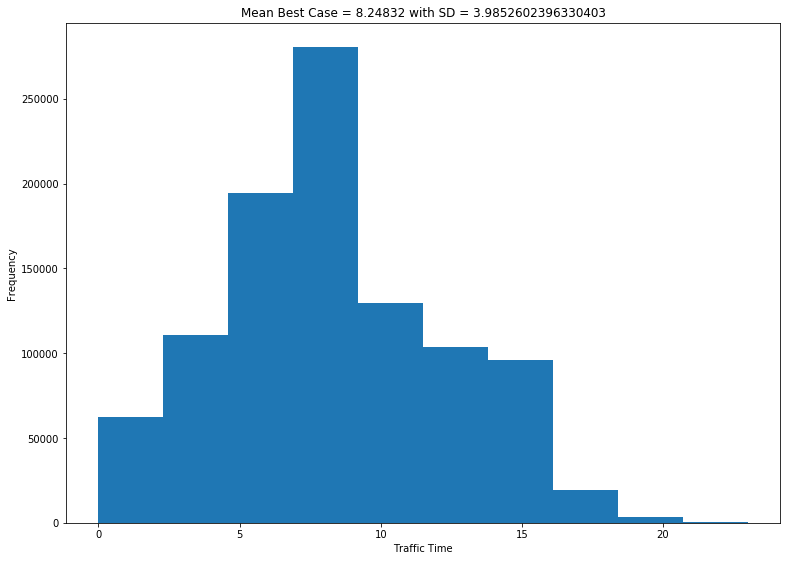

In [8]:
import numpy as np
theoretical = sum([Berlin.nodes()[n]['Kiez']*(Berlin.nodes()[n]['Pop']/berlins_population) for n in Berlin.nodes()])
print(theoretical)

record_min_times = []


#create the sampling vector
sampling_vector = []
for n in Berlin.nodes():
    for _ in range(round((Berlin.nodes()[n]['Pop']/berlins_population)*100000)):
        sampling_vector.append([n])

#sample from the distribution
for i in range(1000000):

    neighborhood_choosen = rd.choice(sampling_vector)
    
    record_min_times.append(abs(round(rd.normalvariate(Berlin.nodes()[neighborhood_choosen[0]]['Kiez'], 2))))

plt.figure(figsize = (12.8, 9.2))    
plt.hist(record_min_times)
plt.xlabel("Traffic Time")
plt.ylabel("Frequency")
plt.title(f"Mean Best Case = {np.mean(record_min_times)} with SD = {np.std(record_min_times)}")

In [9]:
print(np.percentile(record_min_times, q = (0, 95)))
print(max(record_min_times))
print(np.std([Berlin.nodes()[n]['Kiez'] for n in Berlin.nodes()]))

[ 0. 15.]
23
3.4990077958695025


In [0]:


#a given simulation takes an initial number of ambulances and a length
def main(strategy,n_am, length):

    queue = []

    #initialize the simulation
    sim = sim = Simulation(strategy, Berlin, n_am)
    sim.initialize()

    #run the sim for as many minutes as we want
    for _ in range(length):
        sim.oneMinute()
        #record the length of the queu
        queue.append(len(sim.emergencies))

    #return the lengths of the queue and the mean time it took to execute a call
    return queue, np.mean(sim.time_taken)

In [0]:

am_queues = []
times_all = []
pop_at_30 = []

#simulate for 24 hours
time_in_minutes = 1440

#have the maximum number of ambulances be
max_ambulance_number = 50

strategy = 'population'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 100 trials per ambulance number
    for trials in range(100):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])

        if am == 30:
            pop_at_30.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues.append(mean_queue)

    #find the mean of the mean execution times.
    times_all.append(np.mean(times))


[964.88, 925.2, 878.39, 830.48, 787.58, 746.94, 703.32, 656.43, 611.87, 568.98, 527.53, 476.95, 428.33, 385.63, 339.23, 289.92, 254.81, 200.97, 147.43, 107.35, 45.0, 9.67, 1.41, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


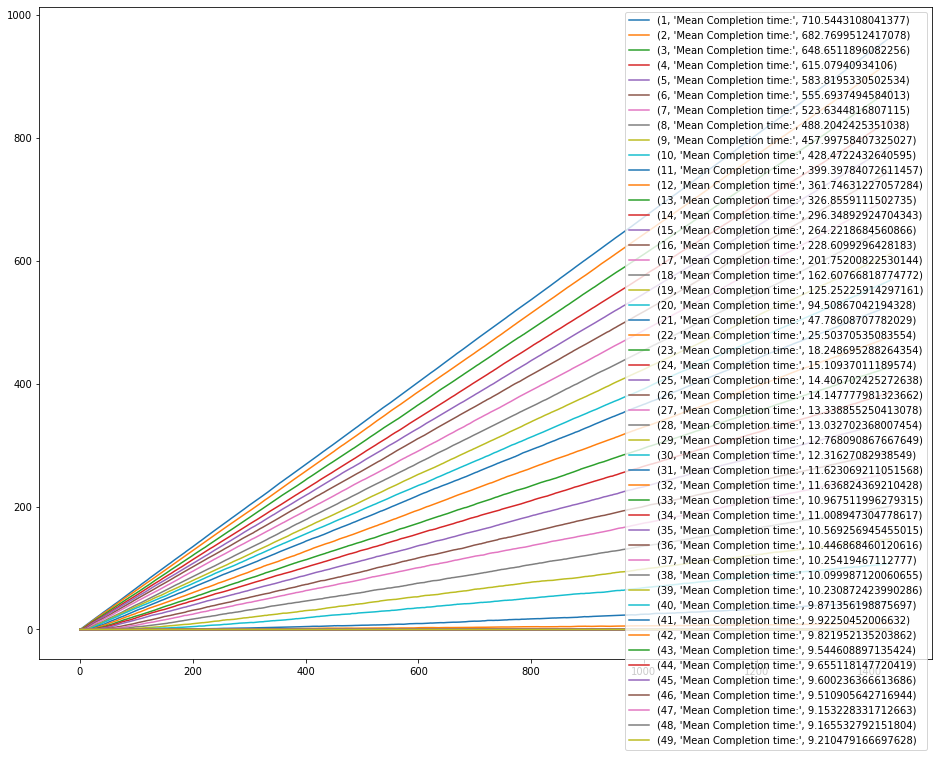

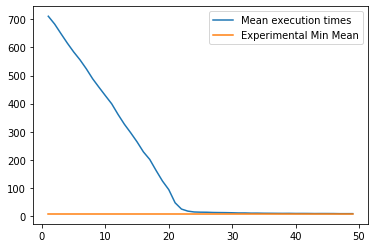

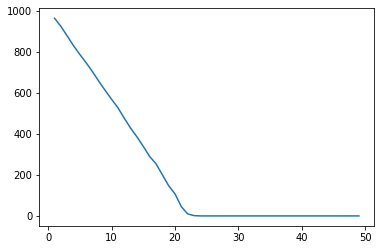

In [12]:
no_ambu = list(range(1, max_ambulance_number))

plt.figure(figsize=(16,12))
for i in range(len(am_queues)):

    plt.plot(list(range(time_in_minutes)), am_queues[i])

plt.legend(([(no_ambu[i], "Mean Completion time:", times_all[i]) for i in range(len(no_ambu))]))

plt.figure()
plt.plot(no_ambu, times_all)
min_mean = np.mean(record_min_times)
plt.plot(no_ambu, [min_mean for n in range(len(no_ambu))])
plt.legend(('Mean execution times', 'Experimental Min Mean'))

final_q_len =  [am_queues[i][-1] for i in range(len(am_queues))]
print(final_q_len)
plt.figure()
plt.plot(list(range(1, max_ambulance_number)), final_q_len)


## Strategy 2 - Degree Based

The first strategy accounted for the probability of an incident happening somewhere and tried to maximise the probability that there is an ambulance in the neighborhood that the emergency occurs in.

However, when there are not enough ambulances, we could decrease our travel time if we initialized ambulances in central areas, that is in areas with higher overall connectivity/degree. This strategy optimizes the ambulances for the second part of the finding a clostest ambulance (which is trying to find the closest not in neighborhood ambulance) versus trying to increase the likelihood of this scenario not occuring at all. 

Therefore, the second strategy will similar to the first strategy implement a sampling vector that holds a each neighborhood with a likelihood dependent on its degree.  

In [0]:
am_queues_degree = []
times_all_degree = []
deg_at_30 = []
#simulate for 4 hours

#have the maximum number of ambulances be this minus 1


strategy = 'degree'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 30 trials per ambulance number
    for trials in range(100):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])

        if am == 30:
            deg_at_30.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues_degree.append(mean_queue)

    #find the mean of the mean execution times.
    times_all_degree.append(np.mean(times))

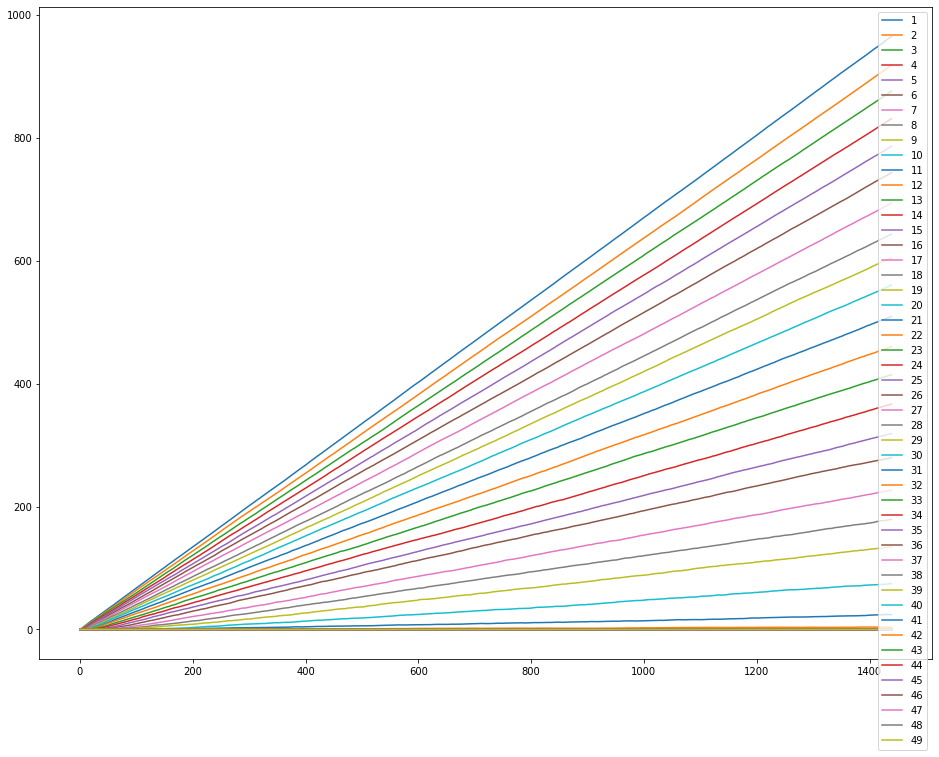

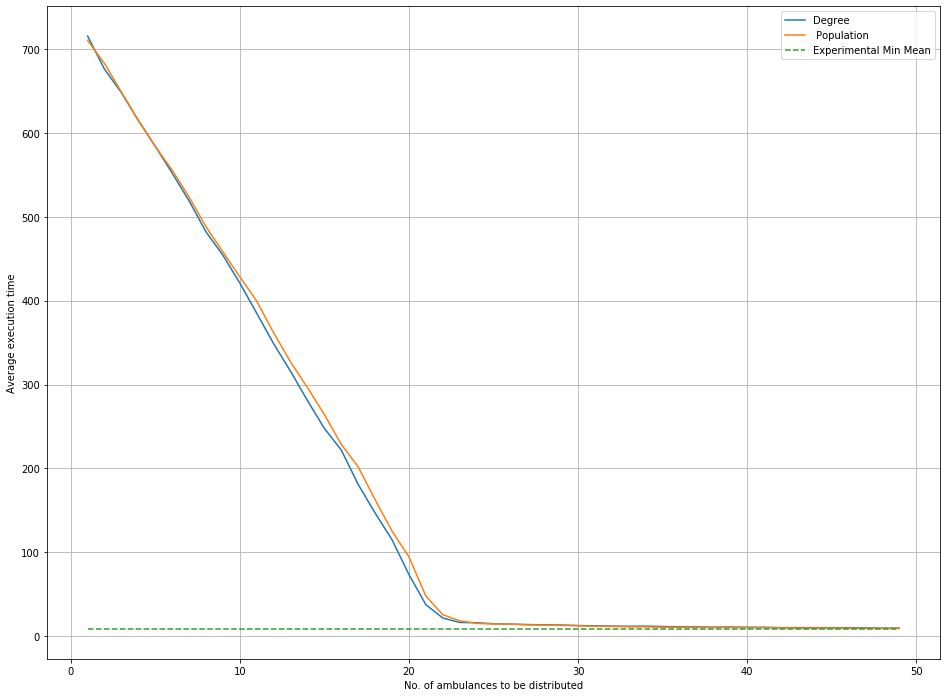

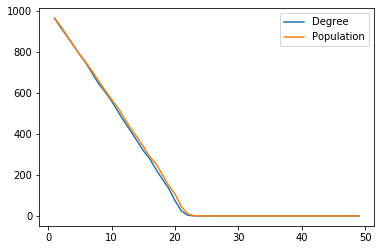

In [14]:
no_ambu = list(range(1, max_ambulance_number))

plt.figure(figsize=(16,12))
for i in range(len(am_queues_degree)):

    plt.plot(list(range(time_in_minutes)), am_queues_degree[i])

plt.legend(([no_ambu[i] for i in range(len(no_ambu))]), loc = 0 )

plt.figure(figsize=(16,12))
plt.plot(no_ambu, times_all_degree)
plt.plot(no_ambu, times_all)
min_mean = np.mean(record_min_times)
plt.plot(no_ambu, [min_mean for n in range(len(no_ambu))], ls = '--')
plt.grid()
plt.xlabel("No. of ambulances to be distributed")
plt.ylabel("Average execution time")
plt.legend(('Degree', ' Population', 'Experimental Min Mean'))

final_q_len_degree =  [am_queues_degree[i][-1] for i in range(len(am_queues_degree))]
#print(final_q_len_degree)
plt.figure()
plt.plot(list(range(1, max_ambulance_number)), final_q_len_degree)
plt.plot(list(range(1, max_ambulance_number)), final_q_len)
plt.legend(('Degree','Population'))



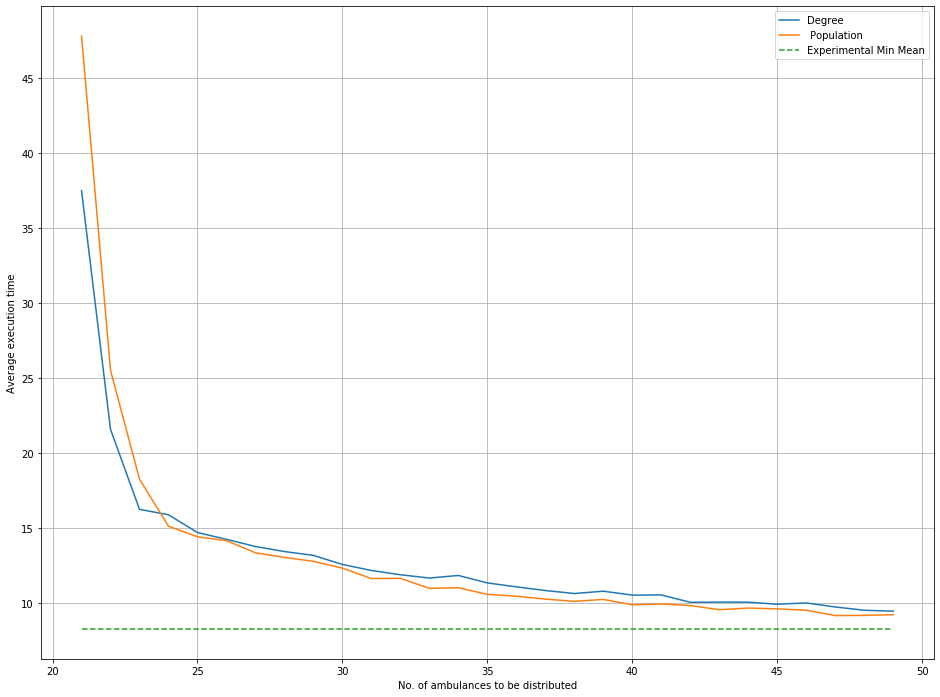

In [15]:
xmin, xmax = 20, len(no_ambu)

plt.figure(figsize=(16,12))
plt.plot(no_ambu[xmin:xmax], times_all_degree[xmin:xmax])
plt.plot(no_ambu[xmin:xmax], times_all[xmin:xmax])
min_mean = np.mean(record_min_times)
plt.plot(no_ambu[xmin:xmax], [min_mean for n in range(len(no_ambu))][xmin:xmax], ls = '--')
plt.grid()
plt.xlabel("No. of ambulances to be distributed")
plt.ylabel("Average execution time")
plt.legend(('Degree', ' Population', 'Experimental Min Mean'))

Population 95% confidence interval from [10.03612457 14.9245887 ] Degree 95% confidence interval from [10.57381528 15.24046276]


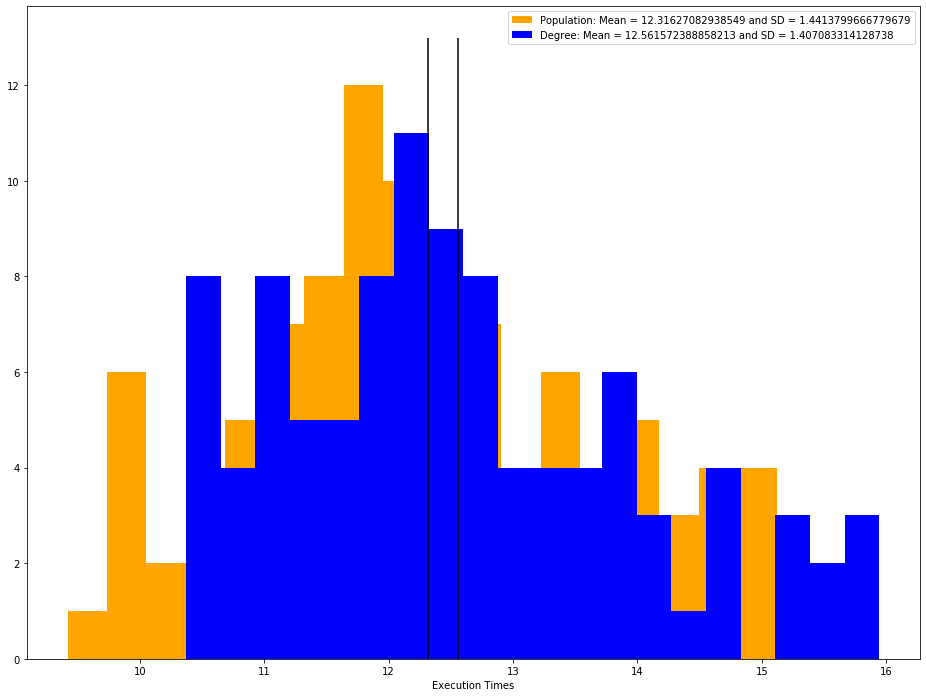

In [16]:
plt.figure(figsize=(16,12))
plt.hist(pop_at_30, bins = 20, color = 'orange')
plt.hist(deg_at_30, bins = 20, color = 'b')
plt.legend((f'Population: Mean = {np.mean(pop_at_30)} and SD = {np.std(pop_at_30)}', f'Degree: Mean = {np.mean(deg_at_30)} and SD = {np.std(deg_at_30)}'))
plt.vlines((np.mean(pop_at_30), np.mean(deg_at_30)), ymax = 13, ymin = 0)
plt.xlabel("Execution Times")

print(f'Population 95% confidence interval from {np.percentile(pop_at_30, (5, 95))}', f'Degree 95% confidence interval from {np.percentile(deg_at_30, (5, 95))}')

## Testing for complete graph with power law distribution

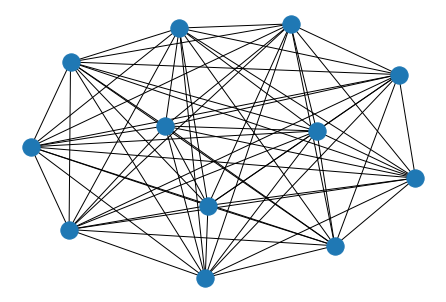

In [17]:
#List of all nodes and their populations
PowerPopulation = nx.Graph()

PowerPopulation.add_weighted_edges_from((u,v, 10) for u,v in
nx.complete_graph(12).edges())
n = 1
for n in PowerPopulation.nodes():

    PowerPopulation.nodes()[n]['Pop'] = 2**n
    PowerPopulation.nodes()[n]['Kiez'] = 10
    n += 1

nx.draw(PowerPopulation)

In [0]:
#a given simulation takes an initial number of ambulances and a length
def main(strategy,n_am, length):

    queue = []

    #initialize the simulation
    sim = sim = Simulation(strategy, PowerPopulation, n_am)
    sim.initialize()

    #run the sim for as many minutes as we want
    for _ in range(length):
        sim.oneMinute()
        #record the length of the queu
        queue.append(len(sim.emergencies))

    #return the lengths of the queue and the mean time it took to execute a call
    return queue, np.mean(sim.time_taken)

In [0]:
am_queues = []
times_all = []
pop_at_30 = []

#simulate for 4 hours
time_in_minutes = 240

#have the maximum number of ambulances be
max_ambulance_number = 40

strategy = 'population'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 30 trials per ambulance number
    for trials in range(20):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])

        if am == 30:
            pop_at_30.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues.append(mean_queue)

    #find the mean of the mean execution times.
    times_all.append(np.mean(times))

In [0]:
am_queues_degree = []
times_all_degree = []
deg_at_30 = []

#simulate for 4 hours

#have the maximum number of ambulances be this minus 1


strategy = 'degree'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 30 trials per ambulance number
    for trials in range(20):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])

        if am == 30:
            deg_at_30.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues_degree.append(mean_queue)

    #find the mean of the mean execution times.
    times_all_degree.append(np.mean(times))

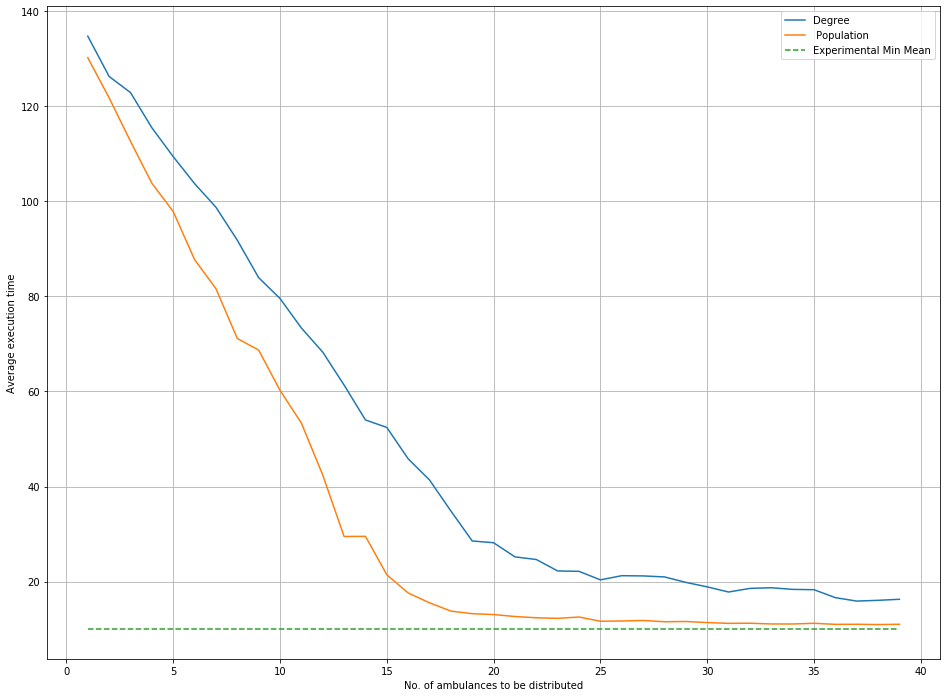

In [21]:
no_ambu = list(range(1, max_ambulance_number))

plt.figure(figsize=(16,12))
plt.plot(no_ambu, times_all_degree)
plt.plot(no_ambu, times_all)
min_mean = np.mean(record_min_times)
plt.plot(no_ambu, [10 for n in range(len(no_ambu))], ls = '--')
plt.grid()
plt.xlabel("No. of ambulances to be distributed")
plt.ylabel("Average execution time")
plt.legend(('Degree', ' Population', 'Experimental Min Mean'))


Population 95% confidence interval from [10.2714632  13.10163167] Degree 95% confidence interval from [14.65758609 23.95063588]


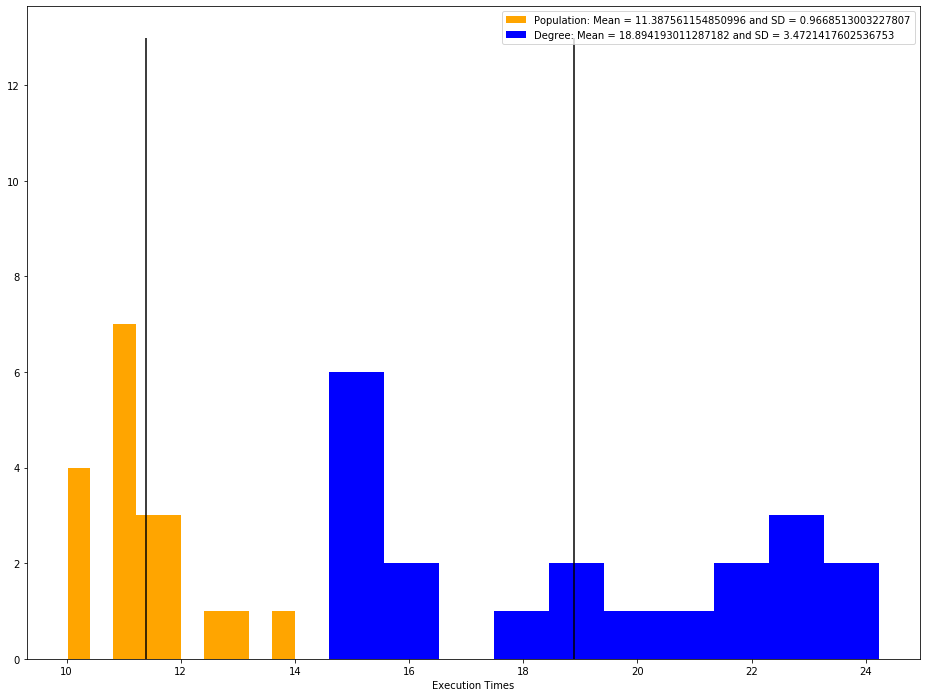

In [22]:
plt.figure(figsize=(16,12))
plt.hist(pop_at_30, bins = 10, color = 'orange')
plt.hist(deg_at_30, bins = 10, color = 'b')
plt.legend((f'Population: Mean = {np.mean(pop_at_30)} and SD = {np.std(pop_at_30)}', f'Degree: Mean = {np.mean(deg_at_30)} and SD = {np.std(deg_at_30)}'))
plt.vlines((np.mean(pop_at_30), np.mean(deg_at_30)), ymax = 13, ymin = 0)
plt.xlabel("Execution Times")

print(f'Population 95% confidence interval from {np.percentile(pop_at_30, (5, 95))}', f'Degree 95% confidence interval from {np.percentile(deg_at_30, (5, 95))}')

## Testing for Barabasi-Albert Graph

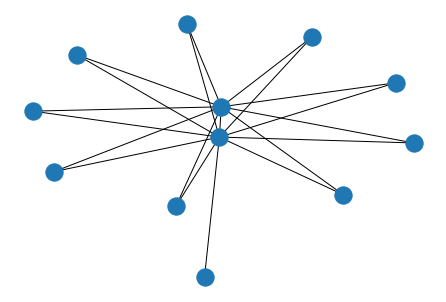

In [23]:
#List of all nodes and their populations
BA = nx.barabasi_albert_graph(12, 10)

n = 1
for n in BA.nodes():

    BA.nodes()[n]['Pop'] = 1
    BA.nodes()[n]['Kiez'] = 10

for e in BA.edges():
    BA[e[0]][e[1]]['weight'] = 10
nx.draw(BA)

(array([1., 9., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

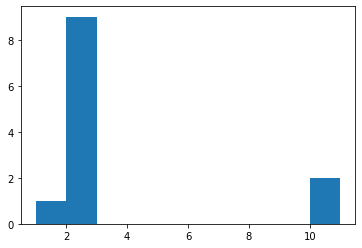

In [24]:
plt.hist([BA.degree(n) for n in BA.nodes()])

In [0]:
#a given simulation takes an initial number of ambulances and a length
def main(strategy,n_am, length):

    queue = []

    #initialize the simulation
    sim = sim = Simulation(strategy, BA, n_am)
    sim.initialize()

    #run the sim for as many minutes as we want
    for _ in range(length):
        sim.oneMinute()
        #record the length of the queu
        queue.append(len(sim.emergencies))

    #return the lengths of the queue and the mean time it took to execute a call
    return queue, np.mean(sim.time_taken)

In [0]:
am_queues = []
times_all = []
pop_at_15 = []

#simulate for 4 hours
time_in_minutes = 240

#have the maximum number of ambulances be
max_ambulance_number = 40

strategy = 'population'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 30 trials per ambulance number
    for trials in range(20):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])
        if am == 15:
            pop_at_15.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues.append(mean_queue)

    #find the mean of the mean execution times.
    times_all.append(np.mean(times))

In [0]:
am_queues_degree = []
times_all_degree = []
deg_at_15 = []

strategy = 'degree'

#for the number of ambulances
for am in range(1, max_ambulance_number):

    
    one_am = []
    times = []
    #do 30 trials per ambulance number
    for trials in range(20):
        
        #for each trial
        #record the time it took them and the 
        out = main(strategy, am, time_in_minutes)
        one_am.append(out[0])
        times.append(out[1])
        if am ==15:
            deg_at_15.append(out[1])
    
    #find the mean queue length for each ambulance number
    mean_queue = []
    for i in range(len(one_am[0])):
        a_instance = []
        for j in range(len(one_am)):
            a_instance.append(one_am[j][i])
    
        mean_queue.append(np.mean(a_instance))
    am_queues_degree.append(mean_queue)

    #find the mean of the mean execution times.
    times_all_degree.append(np.mean(times))

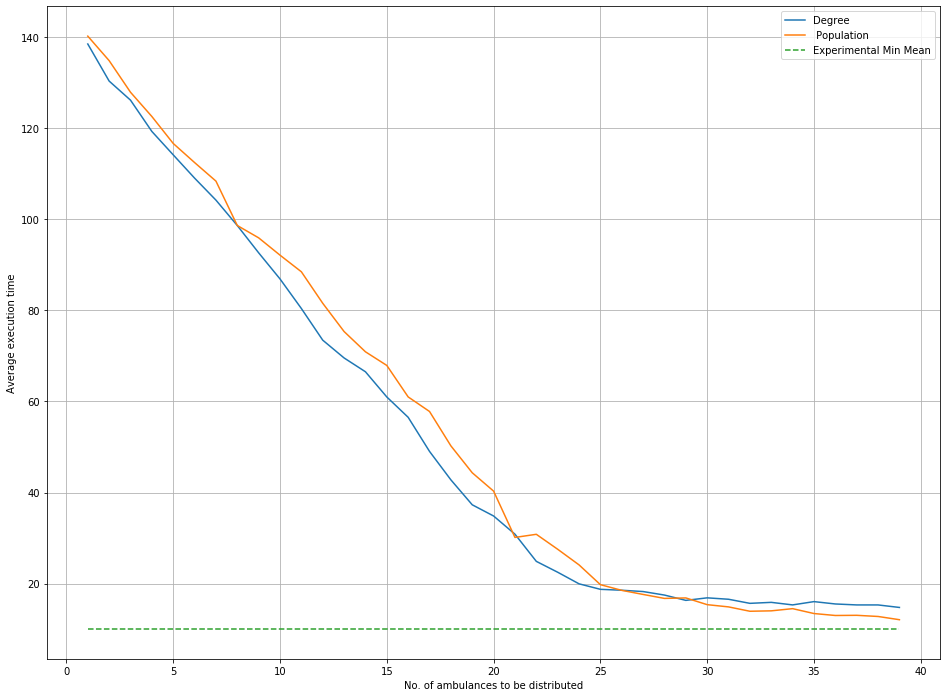

In [28]:
no_ambu = list(range(1, max_ambulance_number))

plt.figure(figsize=(16,12))
plt.plot(no_ambu, times_all_degree)
plt.plot(no_ambu, times_all)
min_mean = np.mean(record_min_times)
plt.plot(no_ambu, [10 for n in range(len(no_ambu))], ls = '--')
plt.grid()
plt.xlabel("No. of ambulances to be distributed")
plt.ylabel("Average execution time")
plt.legend(('Degree', ' Population', 'Experimental Min Mean'))


Population 90% confidence interval from [57.9968709  75.91090348] Degree 90% confidence interval from [56.23666667 66.36086827]


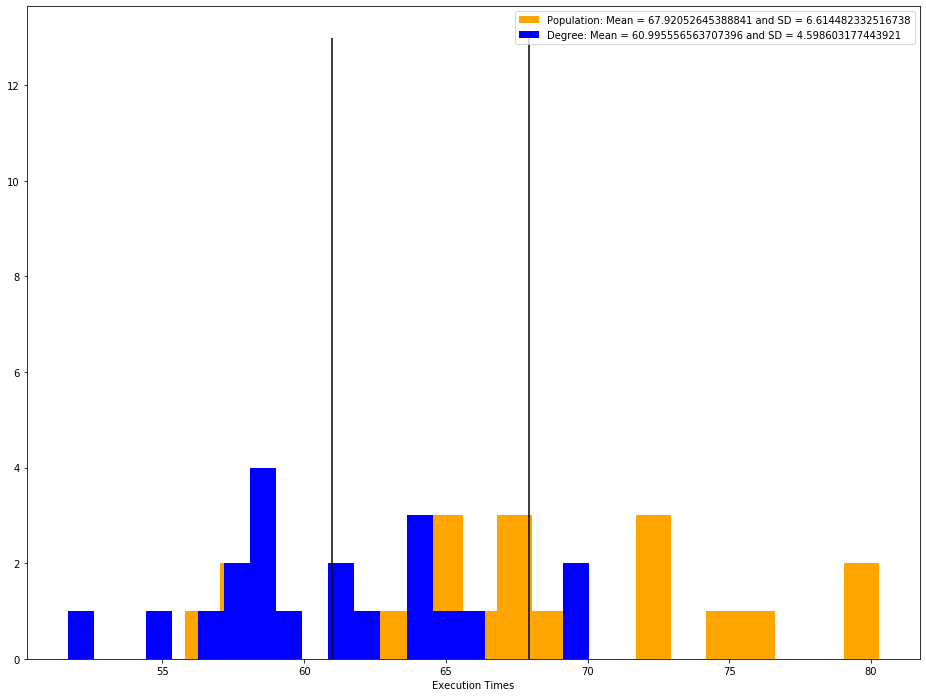

In [29]:
plt.figure(figsize=(16,12))
plt.hist(pop_at_15, bins = 20, color = 'orange')
plt.hist(deg_at_15, bins = 20, color = 'b')
plt.legend((f'Population: Mean = {np.mean(pop_at_15)} and SD = {np.std(pop_at_15)}', f'Degree: Mean = {np.mean(deg_at_15)} and SD = {np.std(deg_at_15)}'))
plt.vlines((np.mean(pop_at_15), np.mean(deg_at_15)), ymax = 13, ymin = 0)
plt.xlabel("Execution Times")

print(f'Population 90% confidence interval from {np.percentile(pop_at_15, (10, 90))}', f'Degree 90% confidence interval from {np.percentile(deg_at_15, (10, 90))}')